In [54]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from plotnine import *
                                               

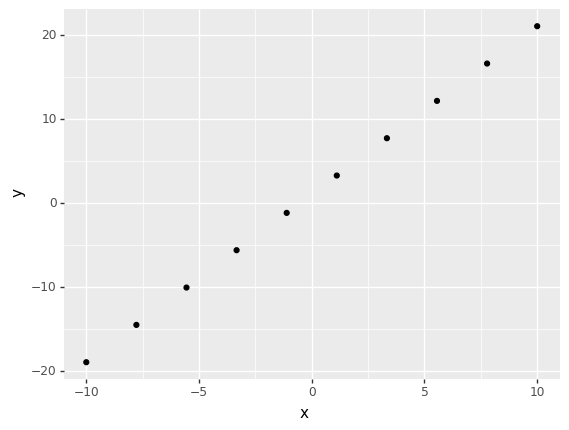

<ggplot: (96091469502)>

In [3]:
# Let us begin with a simple linear model where our dataset consists of a single explanatory variable.
# That is {(x_i,y_i}} where for all 1<=i<=n  y_i = beta_1 * x_i + beta_0.

beta1, beta0 = 2, 1
x = np.linspace(-2, 100, 20)
y = beta1*x + beta0

# Using geom_point we plot the data-points
df = DataFrame({'x':x, 'y':y})
ggplot(df, aes(x='x', y='y')) + geom_point()




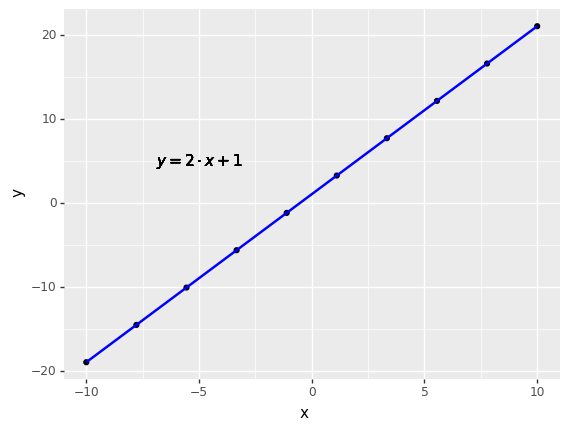

<ggplot: (-9223371940763299240)>

In [4]:
# Next, we are interested in plotting the regression line of y~x. Namely, asking how does x's change influence y.
# See geom_smooth documentation: https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_smooth.html
(ggplot(DataFrame({'x':x, 'y':y}), aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method="lm", color="blue") + 
    geom_text(x=20, y=100 ,label=r"$y={}\cdot x+{}$".format(beta1, beta0)))




In [5]:
# Over this simple dataset let us compute the linear regression and obtain the values of the coefficients beta0, beta1.
# As the data is noiseless, and resides exactly on a line, these coefficients will be the true beta0, beta1 rather than 
# estimator

from sklearn import linear_model
X = DataFrame({"x": x})
model = linear_model.LinearRegression()

# See here for LinearRegression.fit documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
# IMPORTANT - this function expects the data matrix X to be (nsamples, mfeatures) while in class we used 
# the transposed notation of (mfeatures, nsamples)
model.fit(X, y)
print("Fitted linear model over noiseless data: beta1={}, beta0={}".format(model.coef_[0], model.intercept_))




Fitted linear model over noiseless data: beta1=2.0, beta0=1.0000000000000004
R^2=1.0


Fitted linear model over noiseless data: beta1=2.4071805382420943, beta0=1.9295021704444366


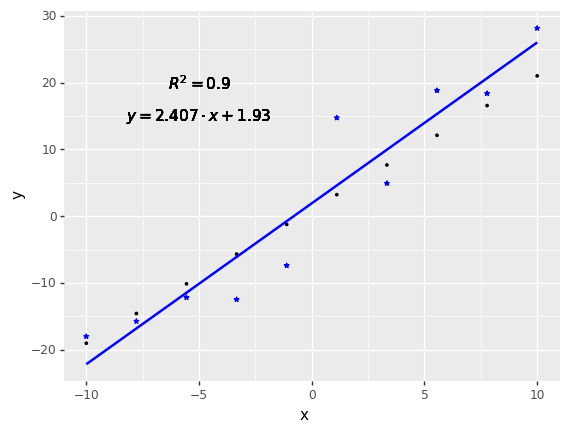

<ggplot: (96093710740)>

In [6]:
#The R^2 is a measurement of how much of the data variation the model manages to explain. Ranges from 0-1 
# where 1 means it explained all of the variation in the data    
r_sq = round(model.score(X, y), 2)
print("R^2={}".format(r_sq))




In [7]:
epsilon = np.random.normal(loc=10, scale=20, size=len(x))
y = beta1*x + beta0
y_noisy = beta1*x + beta0 + epsilon

(ggplot(DataFrame({'x':x, 'y':y, 'y_noisy':y_noisy})) + 
    geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
    geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5))




In [ ]:
model = linear_model.LinearRegression()
model.fit(X, y_noisy)
print("Fitted linear model over noiseless data: \nbeta1={}, beta0={}".format(model.coef_[0], model.intercept_))




In [ ]:
y_hat = model.predict(X)
df = DataFrame({'x':x, 'y':y, 'y_noisy':y_noisy, 'y_hat': y_hat }) 
(ggplot(df) + 
    geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
    geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5) + 
    geom_point(aes(x='x', y='y_hat'), color="blue", shape="x", size=1.5))




In [ ]:
equation = r"$y={}\cdot x+{}$".format(round(model.coef_[0], 3), 
                                      round(model.intercept_, 3))
r_sq = r"$R^2={}$".format(round(model.score(X, y_noisy), 2))

(ggplot(df) + 
    geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
    geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5) + 
    geom_point(aes(x='x', y='y_hat'), color="blue", shape="x", size=1.5) + 
    geom_line(aes(x='x', y='y_hat'), color="blue", linetype="dashed", alpha=0.3, size=1) +
    geom_text(x=20, y=160, label=r_sq) + 
    geom_text(x=20, y=140, label=equation))


[ -2.           3.36842105   8.73684211  14.10526316  19.47368421
  24.84210526  30.21052632  35.57894737  40.94736842  46.31578947
  51.68421053  57.05263158  62.42105263  67.78947368  73.15789474
  78.52631579  83.89473684  89.26315789  94.63157895 100.        ]
[ 10.32717041   8.47566084  21.50872841  29.05294923  20.79865099
  33.72850356  42.08299864  45.42734642  45.82520019  49.97274354
  68.73808029  66.68624426  71.33377675  75.82910657  82.98541932
 103.27573124 103.14160152  92.17703008 103.29840224 112.75583734]
(1, 20)
(20,)
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100.]
             x           y     y_noisy       y_hat  r_squared  sigma
0    -2.000000   -3.000000  -84.612250   21.248362   0.570281    100
1     3.368421    7.736842  -54.136740   26.647868   0.570281    100
2     8.736842   18.473684  272.634140   32.047374   0.570281    100
3    14.105263   29.210526   49.922901   37.446879   0.570281    100
4    19.

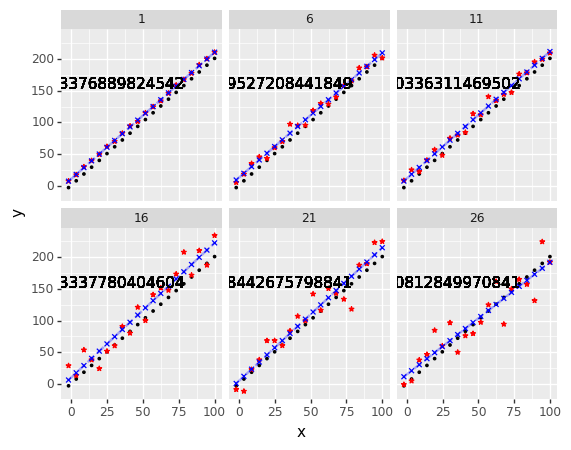

<ggplot: (-9223371874124962264)>


In [77]:
import numpy as np
from sklearn import linear_model
from pandas import DataFrame

def add_noise(data, mu, sigma):
    """
    :param data: numpy array to add gaussian noise to
    :param mu: The expectation of the gaussian noise
    :param sigma: The standard deviation of the gaussian noise
    :return: np array of data with noise
    """
    return data + np.random.normal(mu, sigma, len(data))
        
def fit_model(x, y):
    """
    :param x:  numpy array of dataset samples 
    :param y: numpy array of response vector 
    :return: A fitted Linear Regression model using sklearn
    """
    model = linear_model.LinearRegression()
    
    return model.fit(x, y)
   

def create_df(x, y, mu, sigma):
    """
    Return a DataFrame with the following columns (exact order and names): x, y, y_noisy, y_hat, r_squared, sigma
        1) y_noisy - should be the y values after noise was added
        2) y_hat - the model's prediction ofr the y values for the given x values.
        3) r_squared - the goodness of fit measurement of the fitted model
        4) sigma - the sigma value the values of this DataFrame were created with
    Hint: On what y values should the model be trained? (In the real world do we ever observe y itself?)
    :param x: The explanatory variable
    :param y: The response variable
    :param mu:  The expectation of the gaussian noise to add 
    :param sigma: The standard deviation of the gaussian noise to add
    :return: The created DataFrame
    """
    
    def sss(x):
        
        return np.array([x]).transpose()
                                          
    noise = add_noise(y, mu, sigma) 
    model = fit_model(sss(x), noise)
    sigmas = print(sigma * np.ones( len(y) ))
    return DataFrame(\
                     { 
                        'x':x,
                        'y':y,
                        'y_noisy': noise ,
                        'y_hat': model.predict(sss(x)),
                        'r_squared': model.score(sss(x), y),  
                        'sigma' :  [ sigma for _ in range(len(y)) ]
                         }) 
    

def plot_lm_fitting_for_different_noises(x, y, mu, sigmas):
    """"
    :param x: The explanatory variable
    :param y: The response variable
    :param mu:  The expectation of the gaussian noise to add 
    :param sigmas: A list of standard deviation noises to apply to response data
    :return: A ggplot with the following:
        1) In black the original x-y points
        2) In red the x-y_noisy points (shape is `*`)
        3) In blue the x-y_hat points (shape is `x`)
        4) A dashed line for the x-y_hat - see geom_line (and linetype='dashed')
        5) Text showing the r_squared 
        6) One plot for each value of sigma
    Hint 1: `geom_text` also receices an `aes(...)` argument.
    Hint 2: Recall `facet_wrap` from previous lab
    """
    #df = create_df(x, y, mu, sigma )
    g = [ ]
    
    for sigma in sigmas:
        g.append(create_df(x, y, mu, sigma ))
                  
    df = pd.concat(g)

    p = ggplot(df, aes(x='x')) + geom_point(aes(x='x',y='y'), color="black", size=0.5) + \
            geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5) + \
            geom_point(aes(x='x', y='y_hat'), color="blue", shape="x", size=1.5) + \
            geom_line(aes(x='x', y='y_hat'), color="blue", linetype="dashed", alpha=0.3, size=1) + \
            geom_text(aes(label='r_squared'),x=20, y=160) + \
            facet_wrap('~sigma')

    
    return p
# Simple testing code
x = np.linspace(-2, 100, 20)
print(x)
print( add_noise(x, 10 , 7) )
y = 2*x + 1

df = create_df(x, y, 1, 100)

print(df)

plot_lm_fitting_for_different_noises(x, y, 10, np.arange(1, 27, 5))

